In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from collections import defaultdict

# Experimental Constants

In [10]:
NUM_REPEATS = 10
# TRAIN_SIZE = 0.5

In [11]:
real_results_path = "../results/real_data/"
method_types = {'models_causal_impute': {'meta_learner': ['t_learner', 's_learner', 'x_learner', 'dr_learner'], 
                                         'dml_learner':  ['double_ml', 'causal_forest']}, 
                'models_causal_survival': ['causal_survival_forest'], 
                'models_causal_survival_meta': ['t_learner_survival', 's_learner_survival', 'matching_learner_survival']}

imputation_methods = ['Pseudo_obs', 'Margin', 'IPCW-T']
survival_models = ['RandomSurvivalForest', 'DeepSurv', 'DeepHit']

# File Loading and Structure of Results Pickles

In [12]:
# Loop through all method types
for method_category, subtypes in method_types.items():
    print(f"\n=== {method_category} ===")
    
    if method_category == 'models_causal_impute':
        for subgroup, method_list in subtypes.items():
            for method in method_list:
                method_path = os.path.join(real_results_path, method_category, subgroup, method)
                if not os.path.exists(method_path):
                    print(f"Path not found: {method_path}")
                    continue

                for imp in imputation_methods:
                    file_name = f"twin_{method}_{imp}_repeats_{NUM_REPEATS}.pkl"
                    file_path = os.path.join(method_path, file_name)
                    if os.path.exists(file_path):
                        print(file_path)
                        if subgroup == 'meta_learner':
                            file_path_impute_meta = file_path
                        else:
                            file_path_impute_dml = file_path
                    else:
                        print(f"Missing: {file_path}")

    elif method_category == 'models_causal_survival':
        for method in subtypes:
            method_path = os.path.join(real_results_path, method_category, method)
            if not os.path.exists(method_path):
                print(f"Path not found: {method_path}")
                continue

            file_name = f"twin_{method}_repeats_{NUM_REPEATS}.pkl"
            file_path = os.path.join(method_path, file_name)
            if os.path.exists(file_path):
                print(file_path)
                file_path_causal_survival = file_path
            else:
                print(f"Missing: {file_path}")

    elif method_category == 'models_causal_survival_meta':
        for method in subtypes:
            method_path = os.path.join(real_results_path, method_category, method)
            if not os.path.exists(method_path):
                print(f"Path not found: {method_path}")
                continue

            for surv in survival_models:
                file_name = f"twin_{method}_{surv}_repeats_{NUM_REPEATS}.pkl"
                file_path = os.path.join(method_path, file_name)
                if os.path.exists(file_path):
                    print(file_path)
                    file_path_causal_survival_meta = file_path
                else:
                    print(f"Missing: {file_path}")


=== models_causal_impute ===
../results/real_data/models_causal_impute/meta_learner/t_learner/twin_t_learner_Pseudo_obs_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/t_learner/twin_t_learner_Margin_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/t_learner/twin_t_learner_IPCW-T_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/s_learner/twin_s_learner_Pseudo_obs_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/s_learner/twin_s_learner_Margin_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/s_learner/twin_s_learner_IPCW-T_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/x_learner/twin_x_learner_Pseudo_obs_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/x_learner/twin_x_learner_Margin_repeats_10.pkl
../results/real_data/models_causal_impute/meta_learner/x_learner/twin_x_learner_IPCW-T_repeats_10.pkl
../results/real_data/models_causal_imput

In [13]:
with open(file_path_impute_meta, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_impute_meta}")

print(f"Category: models_causal_impute_meta")
print(f"Subgroup: meta_learner")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['twin'].keys()))
print()
print("Base Regression Methods: (third layer keys):")
print(list(data['twin']['scenario_1'].keys()))
print()
print("Experiment Repeats: (fourth layer keys):")
print(list(data['twin']['scenario_1']['xgb'].keys()))
print()
print("(a) Specific Experiment Repeat: (fifth layer keys):")
print(list(data['twin']['scenario_1']['xgb'][0].keys()))
print("(b) Average of all Experiment Repeats: (fifth layer keys):")
print(list(data['twin']['scenario_1']['xgb']['average'].keys()))

Loaded data from ../results/real_data/models_causal_impute/meta_learner/dr_learner/twin_dr_learner_IPCW-T_repeats_10.pkl
Category: models_causal_impute_meta
Subgroup: meta_learner

Experiment Setups: (first layer keys):
['twin']

Simulation Scenarios: (second layer keys):
['scenario_1']

Base Regression Methods: (third layer keys):
['lasso', 'rf', 'xgb']

Experiment Repeats: (fourth layer keys):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'average']

(a) Specific Experiment Repeat: (fifth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'base_model_eval', 'ate_interval', 'ate_statistics', 'cate_true_val', 'cate_pred_val', 'ate_true_val', 'ate_pred_val', 'cate_mse_val', 'ate_bias_val', 'base_model_eval_val', 'ate_interval_val', 'ate_statistics_val']
(b) Average of all Experiment Repeats: (fifth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_ate_bias', 'base_model_eval', 'mea

In [14]:
with open(file_path_impute_dml, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_impute_dml}")

print(f"Category: models_causal_impute_meta")
print(f"Subgroup: double_machine_learning")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['twin'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['twin']['scenario_1'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['twin']['scenario_1'][0].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['twin']['scenario_1']['average'].keys()))

Loaded data from ../results/real_data/models_causal_impute/dml_learner/causal_forest/twin_causal_forest_IPCW-T_repeats_10.pkl
Category: models_causal_impute_meta
Subgroup: double_machine_learning

Experiment Setups: (first layer keys):
['twin']

Simulation Scenarios: (second layer keys):
['scenario_1']

Experiment Repeats: (third layer keys):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'ate_interval', 'ate_statistics', 'cate_true_val', 'cate_pred_val', 'ate_true_val', 'ate_pred_val', 'cate_mse_val', 'ate_bias_val', 'ate_interval_val', 'ate_statistics_val']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_ate_bias', 'mean_cate_mse_val', 'std_cate_mse_val', 'mean_ate_pred_val', 'std_ate_pred_val', 'mean_ate_true_val', 'std_ate_true_

In [15]:
with open(file_path_causal_survival, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_causal_survival}")

print(f"Category: causal_survival")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['twin'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['twin']['scenario_1'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['twin']['scenario_1'][0].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['twin']['scenario_1']['average'].keys()))

Loaded data from ../results/real_data/models_causal_survival/causal_survival_forest/twin_causal_survival_forest_repeats_10.pkl
Category: causal_survival

Experiment Setups: (first layer keys):
['twin', 'twin180', 'twin30']

Simulation Scenarios: (second layer keys):
['scenario_1']

Experiment Repeats: (third layer keys):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'cate_true_val', 'ate_true_val', 'ate_pred_val', 'cate_mse_val', 'ate_bias_val']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_ate_bias', 'mean_cate_mse_val', 'std_cate_mse_val', 'mean_ate_pred_val', 'std_ate_pred_val', 'mean_ate_true_val', 'std_ate_true_val', 'mean_ate_bias_val', 'std_ate_bias_val', 'runtime']


In [16]:
with open(file_path_causal_survival_meta, 'rb') as f:
        data = pickle.load(f)
        print(f"Loaded data from {file_path_causal_survival_meta}")

print(f"Category: causal_survival")
print()
print("Experiment Setups: (first layer keys):")
print(list(data.keys()))
print()
print("Simulation Scenarios: (second layer keys):")
print(list(data['twin'].keys()))
print()
print("Experiment Repeats: (third layer keys):")
print(list(data['twin']['scenario_1'].keys()))
print()
print("(a) Specific Experiment Repeat: (fourth layer keys):")
print(list(data['twin']['scenario_1'][0].keys()))
print("(b) Average of all Experiment Repeats: (fourth layer keys):")
print(list(data['twin']['scenario_1']['average'].keys()))

Loaded data from ../results/real_data/models_causal_survival_meta/matching_learner_survival/twin_matching_learner_survival_DeepHit_repeats_10.pkl
Category: causal_survival

Experiment Setups: (first layer keys):
['twin']

Simulation Scenarios: (second layer keys):
['scenario_1']

Experiment Repeats: (third layer keys):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'average']

(a) Specific Experiment Repeat: (fourth layer keys):
['cate_true', 'cate_pred', 'ate_true', 'ate_pred', 'cate_mse', 'ate_bias', 'base_model_eval', 'cate_true_val', 'ate_true_val', 'ate_pred_val', 'cate_mse_val', 'ate_bias_val', 'base_model_eval_val']
(b) Average of all Experiment Repeats: (fourth layer keys):
['mean_cate_mse', 'std_cate_mse', 'mean_ate_pred', 'std_ate_pred', 'mean_ate_true', 'std_ate_true', 'mean_ate_bias', 'std_ate_bias', 'base_model_eval', 'mean_cate_mse_val', 'std_cate_mse_val', 'mean_ate_pred_val', 'std_ate_pred_val', 'mean_ate_true_val', 'std_ate_true_val', 'mean_ate_bias_val', 'std_ate_bias_val', 'base_mod

# Aggregate results

In [10]:
# Constants

# Setup
method_types = {
    'models_causal_impute': {
        'meta_learner': ['t_learner', 's_learner', 'x_learner', 'dr_learner'],
        'dml_learner':  ['double_ml', 'causal_forest']
    },
    'models_causal_survival': ['causal_survival_forest'],
    'models_causal_survival_meta': ['t_learner_survival', 's_learner_survival', 'matching_learner_survival']
}

imputation_methods = ['Pseudo_obs', 'Margin', 'IPCW-T']
survival_models = ['RandomSurvivalForest', 'DeepSurv', 'DeepHit']

experiment_setups = ['twin']
scenarios = ['scenario_1']

In [ ]:
# Helper function
def extract_repeat_metrics(data, path_keys, metrics_of_interest=['ate_true', 'ate_pred', 'cate_mse', 'ate_bias']):
    result = defaultdict(list)
    for repeat_key in data:
        if repeat_key == "average":
            continue
        for metric in data[repeat_key]:
            if metric not in metrics_of_interest:
                continue
            result[metric].append(data[repeat_key][metric])
    return dict(result)

# Initialize aggregation dictionary
aggregated_results = {scen: {exp: defaultdict(dict) for exp in experiment_setups} for scen in scenarios}

# Processing files
for method_category, subtypes in method_types.items():
    if method_category == 'models_causal_impute':
        for subgroup, method_list in subtypes.items():
            for method in method_list:
                for imp in imputation_methods:
                    if subgroup == 'meta_learner':
                        file_name = f"twin_{method}_{imp}_repeats_{NUM_REPEATS}.pkl"
                    file_path = os.path.join(real_results_path, method_category, subgroup, method, file_name)
                    if not os.path.exists(file_path):
                        continue
                    with open(file_path, "rb") as f:
                        data = pickle.load(f)
                    for exp in experiment_setups:
                        if exp not in data:
                            continue
                        for scen in scenarios:
                            if scen not in data[exp]:
                                continue
                            scenario_data = data[exp][scen]
                            if subgroup == 'meta_learner':
                                # Get best base model for this method + imputation
                                best_model, best_mse = None, float("inf")
                                for base_model, content in scenario_data.items():
                                    if content["average"]["mean_cate_mse"] < best_mse:
                                        best_model = base_model
                                        best_mse = content["average"]["mean_cate_mse"]
                                if best_model is None:
                                    continue
                                metrics = extract_repeat_metrics(scenario_data[best_model], [])
                                current = aggregated_results[scen][exp][f"{method_category}/{subgroup}"].setdefault(method, {})
                                current.setdefault("best_candidates", []).append((imp, best_model, best_mse, metrics))
                            else:  # dml_learner
                                mse = scenario_data["average"]["mean_cate_mse"]
                                metrics = extract_repeat_metrics(scenario_data, [])
                                current = aggregated_results[scen][exp][f"{method_category}/{subgroup}"].setdefault(method, {})
                                current.setdefault("best_candidates", []).append((imp, mse, metrics))

    elif method_category == 'models_causal_survival':
        for method in subtypes:
            file_name = f"twin_{method}_repeats_{NUM_REPEATS}.pkl"
            file_path = os.path.join(real_results_path, method_category, method, file_name)
            if not os.path.exists(file_path):
                continue
            with open(file_path, "rb") as f:
                data = pickle.load(f)
            for exp in experiment_setups:
                if exp not in data:
                    continue
                for scen in scenarios:
                    if scen not in data[exp]:
                        continue
                    metrics = extract_repeat_metrics(data[exp][scen], [])
                    aggregated_results[scen][exp][method_category][method] = metrics

    elif method_category == 'models_causal_survival_meta':
        for method in subtypes:
            for surv_model in survival_models:
                file_name = f"twin_{method}_{surv_model}_repeats_{NUM_REPEATS}.pkl"
                file_path = os.path.join(real_results_path, method_category, method, file_name)
                if not os.path.exists(file_path):
                    continue
                with open(file_path, "rb") as f:
                    data = pickle.load(f)
                for exp in experiment_setups:
                    if exp not in data:
                        continue
                    for scen in scenarios:
                        if scen not in data[exp]:
                            continue
                        mse = data[exp][scen]["average"]["mean_cate_mse"]
                        metrics = extract_repeat_metrics(data[exp][scen], [])
                        current = aggregated_results[scen][exp][method_category].setdefault(method, {})
                        current.setdefault("best_candidates", []).append((surv_model, mse, metrics))

# Post-process to pick best candidate for each method
for scen in aggregated_results:
    for exp in aggregated_results[scen]:
        for cat in aggregated_results[scen][exp]:
            for method in aggregated_results[scen][exp][cat]:
                method_entry = aggregated_results[scen][exp][cat][method]
                if "best_candidates" not in method_entry:
                    continue
                candidates = method_entry["best_candidates"]

                # Defensive check to avoid malformed tuples
                if not candidates or not isinstance(candidates[0], tuple):
                    continue

                # Identify key index of mse in tuple
                if cat.endswith("meta_learner"):
                    # (imp, base, mse, metrics)
                    best = min(candidates, key=lambda x: x[2])
                    imp, base, _, metrics = best
                    method_entry.clear()
                    method_entry["best_imputation"] = imp
                    method_entry["best_base_model"] = base
                    method_entry.update(metrics)

                elif cat.endswith("dml_learner"):
                    # (imp, mse, metrics)
                    best = min(candidates, key=lambda x: x[1])
                    imp, _, metrics = best
                    method_entry.clear()
                    method_entry["best_imputation"] = imp
                    method_entry.update(metrics)

                elif cat == "models_causal_survival_meta":
                    # (surv_model, mse, metrics)
                    best = min(candidates, key=lambda x: x[1])
                    surv, _, metrics = best
                    method_entry.clear()
                    method_entry["best_base_survival"] = surv
                    method_entry.update(metrics)

aggregated_results  # This is the final nested dictionary.

# Plotting Helper Functions

In [13]:
'twin'

'twin'

In [ ]:
# Updated mapping for prettier and consistent experiment names
pretty_experiment_names = {
    "twin": "Survival Time: Born Lower(0) vs Higher(1)",
}

# Mapping for pretty method names
pretty_method_names_plotting = {
    "t_learner": "T-\nLearner",
    "s_learner": "S-\nLearner",
    "x_learner": "X-\nLearner",
    "dr_learner": "DR-\nLearner",
    "double_ml": "Double\nML",
    "causal_forest": "Causal\nForest",
    "causal_survival_forest": "Causal\nSurvival\nForest",
    "t_learner_survival": "T-\nLearner\nSurvival",
    "s_learner_survival": "S-\nLearner\nSurvival",
    "matching_learner_survival": "Matching\nSurvival"
}

pretty_method_names = {
    "t_learner": "T-Learner",
    "s_learner": "S-Learner",
    "x_learner": "X-Learner",
    "dr_learner": "DR-Learner",
    "double_ml": "Double-ML",
    "causal_forest": "Causal Forest",
    "causal_survival_forest": "Causal Survival Forest",
    "t_learner_survival": "T-Learner Survival",
    "s_learner_survival": "S-Learner Survival",
    "matching_learner_survival": "Matching Survival"
}

# pretty_method_names_plotting = pretty_method_names

In [15]:
def aggregated_results_df(aggregated_results, scenario_key, skip_experiments_list=None, metrics=["cate_mse", "ate_bias", "ate_pred", "ate_true"]):
    """
    Convert the aggregated results into a DataFrame for easier manipulation and visualization.
    """
    # Check if the scenario key exists in the aggregated results
    if scenario_key not in aggregated_results:
        print(f"Scenario '{scenario_key}' not found in aggregated results.")
        return

    # Prepare the DataFrame for plotting
    plot_data = []
    for exp_key in aggregated_results[scenario_key]:
        if (skip_experiments_list is not None) and (exp_key in skip_experiments_list):
            continue
        for category in aggregated_results[scenario_key][exp_key]:
            for method in aggregated_results[scenario_key][exp_key][category]:
                entry = aggregated_results[scenario_key][exp_key][category][method]
                
                num_rows_to_add = len(entry["cate_mse"])

                for row_ids in range(num_rows_to_add):
                    row = {
                        "experiment": exp_key,
                        "method": method,
                        "category": category,
                        "best_imputation": entry.get("best_imputation", None),
                        "best_base_model": entry.get("best_base_model", None),
                        "best_base_survival": entry.get("best_base_survival", None),
                    }
                    for metric in metrics:
                        if metric in entry:
                            row[metric] = entry[metric][row_ids]
                        else:
                            row[metric] = None
                    plot_data.append(row)

    df_plot = pd.DataFrame(plot_data)
    # Update this if not done already
    df_plot["method_pretty"] = df_plot["method"].map(pretty_method_names_plotting)
    df_plot["method_pretty_raw"] = df_plot["method"].map(pretty_method_names)

    return df_plot

In [16]:
def pretty_results_table(df_plot):
    # Wider display for specific columns
    pd.set_option('display.max_colwidth', None)  # Show full content of any column

    df_table = df_plot.copy()

    # Drop the 'category' column
    df_table = df_table.drop(columns=["category"])

    # Map experiment names
    df_table['experiment_id'] = df_table['experiment']
    df_table['experiment'] = df_table['experiment'].map(pretty_experiment_names)

    # Group and aggregate
    agg_df = df_table.groupby(["experiment_id", "method_pretty_raw"]).agg(
        cate_mse_mean=("cate_mse", "mean"),
        cate_mse_std=("cate_mse", "std"),
        ate_bias_mean=("ate_bias", "mean"),
        ate_bias_std=("ate_bias", "std"),
        experiment=("experiment", "first"),
        best_imputation=("best_imputation", "first"),
        best_base_model=("best_base_model", "first"),
        best_base_survival=("best_base_survival", "first")
    ).reset_index()

    # Format into "mean ± std"
    agg_df["cate_mse"] = agg_df.apply(
        lambda row: f"{row['cate_mse_mean']:.3f} ± {row['cate_mse_std']:.3f}", axis=1
    )
    agg_df["ate_bias"] = agg_df.apply(
        lambda row: f"{row['ate_bias_mean']:.3f} ± {row['ate_bias_std']:.3f}", axis=1
    )

    # Optionally drop the separate mean and std columns
    agg_df = agg_df.drop(columns=["cate_mse_mean", "cate_mse_std", "ate_bias_mean", "ate_bias_std"])

    # Order based on pretty_experiment_names
    experiment_order = [pretty_experiment_names[key] for key in pretty_experiment_names]
    # Order based on pretty_method_names
    method_order = list(pretty_method_names.values())

    agg_df["experiment"] = pd.Categorical(
        agg_df["experiment"], categories=experiment_order, ordered=True
    )
    agg_df["method_pretty_raw"] = pd.Categorical(
        agg_df["method_pretty_raw"], categories=method_order, ordered=True
    )

    cols = list(agg_df.columns)
    i, j = cols.index("method_pretty_raw"), cols.index("experiment")
    cols[i], cols[j] = cols[j], cols[i]
    agg_df = agg_df[cols]

    agg_df = agg_df.sort_values(by=["experiment", "method_pretty_raw"]).reset_index(drop=True)
    agg_df.rename(columns={"method_pretty_raw": "method"}, inplace=True)
    agg_df["best_base_model"] = agg_df["best_base_model"].fillna(" ")
    agg_df["best_base_survival"] = agg_df["best_base_survival"].fillna(" ")
    agg_df["best_imputation"] = agg_df["best_imputation"].fillna(" ")
    return agg_df

In [19]:
def plot_aggregated_experiment_results(scenario_key, df_plot_raw, skip_experiments_list=None, 
                                       metric="cate_mse", y_lim=None, title_include_scenario=False):
    """
    Plot the aggregated results for a specific scenario.

    Parameters:
    - scenario_key: The key for the scenario to plot.
    - aggregated_results: The dictionary containing the aggregated results.
    - skip_experiments_list: A list of experiments to skip in the plot.
    - y_lim: The y-axis limits for the plot. If None, it will be calculated automatically and matched across all plots.
                If False, no y-axis limits will be set and each plot will have its own limits.
    - title_include_scenario: If True, include the scenario key in the plot title.
    """
    # Check if the scenario key exists in the aggregated results
    if scenario_key not in aggregated_results:
        print(f"Scenario '{scenario_key}' not found in aggregated results.")
        return
    
    # Updated color palette with transparency
    category_palette_alpha = {
        "models_causal_impute/meta_learner": (31/255, 119/255, 180/255, 0.6),   # Blue, light
        "models_causal_impute/dml_learner": (8/255, 77/255, 117/255, 0.8),  # Blue, dark
        "models_causal_survival": (44/255, 160/255, 44/255, 0.8),  # Green
        "models_causal_survival_meta": (214/255, 39/255, 40/255, 0.8)  # Red
    }

    df_plot = df_plot_raw.copy()

    df_plot["color"] = df_plot["category"].map(category_palette_alpha)

    # Global y-axis limits
    if y_lim is None:
        y_min = df_plot[metric].min()
        y_max = df_plot[metric].max()
        y_margin = (y_max - y_min) * 0.1
        y_lim = (y_min - y_margin, y_max + y_margin)

    sns.set(style="whitegrid", font_scale=1.2)
    plt.rcParams["figure.dpi"] = 300

    for exp_key, exp_title in pretty_experiment_names.items():
        if (skip_experiments_list is not None) and (exp_key in skip_experiments_list):
            continue
        exp_df = df_plot[df_plot["experiment"] == exp_key]
        true_ate = exp_df['ate_true']

        plt.figure(figsize=(16, 8))
        ax = plt.gca()

        for i, method in enumerate(exp_df["method_pretty"].unique()):
            method_data = exp_df[exp_df["method_pretty"] == method]
            y_vals = method_data[metric].values
            color = method_data["color"].iloc[0] if not method_data.empty else (0.7, 0.7, 0.7, 0.7)

            # Draw box
            sns.boxplot(
                x=[method] * len(y_vals),
                y=y_vals,
                ax=ax,
                color=color,
                width=0.6,
                showcaps=True,
                boxprops=dict(facecolor=color, edgecolor='black', linewidth=1.2, alpha=color[3]),
                whiskerprops=dict(color='black', linewidth=1.0),
                medianprops=dict(color='black', linewidth=1.0),
                showfliers=False
            )

            # Draw individual scatter points
            x_vals = [i] * len(y_vals)
            ax.scatter(
                x_vals, y_vals,
                color=color,
                edgecolor='k',
                s=35,
                zorder=3,
                alpha=0.9
            )

        # Draw true ATE line
        # if "ate" in metric:
            # ax.axhline(y=true_ate.mean(), color='black', linestyle='--', linewidth=1.5, label="True ATE")
            # ax.legend(loc="upper right", fontsize=12)

        exp_title = f"({scenario_key}) {exp_title}" if title_include_scenario else exp_title

        ax.set_title(exp_title, pad=15, fontsize=28, fontweight="bold")
        if metric == "cate_mse":
            y_label = "CATE MSE"
            ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, label="", zorder=0)
        elif metric == "ate_true":
            y_label = "True ATE"
            ax.axhline(y=true_ate.mean(), color='black', linestyle='--', linewidth=1.5, label="True ATE", zorder=0)
        elif metric == "ate_pred":
            y_label = "Pred ATE"
            ax.axhline(y=true_ate.mean(), color='black', linestyle='--', linewidth=1.5, label="True ATE", zorder=0)
        elif metric == "ate_bias":
            y_label = "ATE Bias"
            ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, label="", zorder=0)
        else:
            y_label = metric
        ax.set_ylabel(y_label, fontsize=20, fontweight="bold")
        ax.set_xlabel("")
        ax.tick_params(axis='y', labelsize=20)
        if y_lim == False:
            y_min = exp_df[metric].min()
            y_max = exp_df[metric].max()
            y_margin = (y_max - y_min) * 0.1
            ax.set_ylim((y_min - y_margin, y_max + y_margin))
        else:
            ax.set_ylim(y_lim)
        ax.set_xticks(range(len(exp_df["method_pretty"].unique())))
        ax.set_xticklabels(exp_df["method_pretty"].unique(), rotation=0, fontsize=20, fontweight="bold")
        # sns.despine(trim=True)
        plt.tight_layout()

        plt.savefig(f"figure_results/real_data/{metric}/twin_{scenario_key}_{exp_key}_{metric}.pdf", dpi=300, bbox_inches='tight')
        plt.show()

# Figure Generation Parameters

(Metric, Experiments to Exclude, Y-Axis Constant)

In [28]:
# skip_experiments_list = ['RCT_0_5', 'RCT_0_05']
metric = "ate_pred"  # Choose from ['cate_mse', 'ate_true', 'ate_pred', 'ate_bias']
y_lim = False # Set to False to use individual y-limits for each plot or None for global limits

# Scenario 1

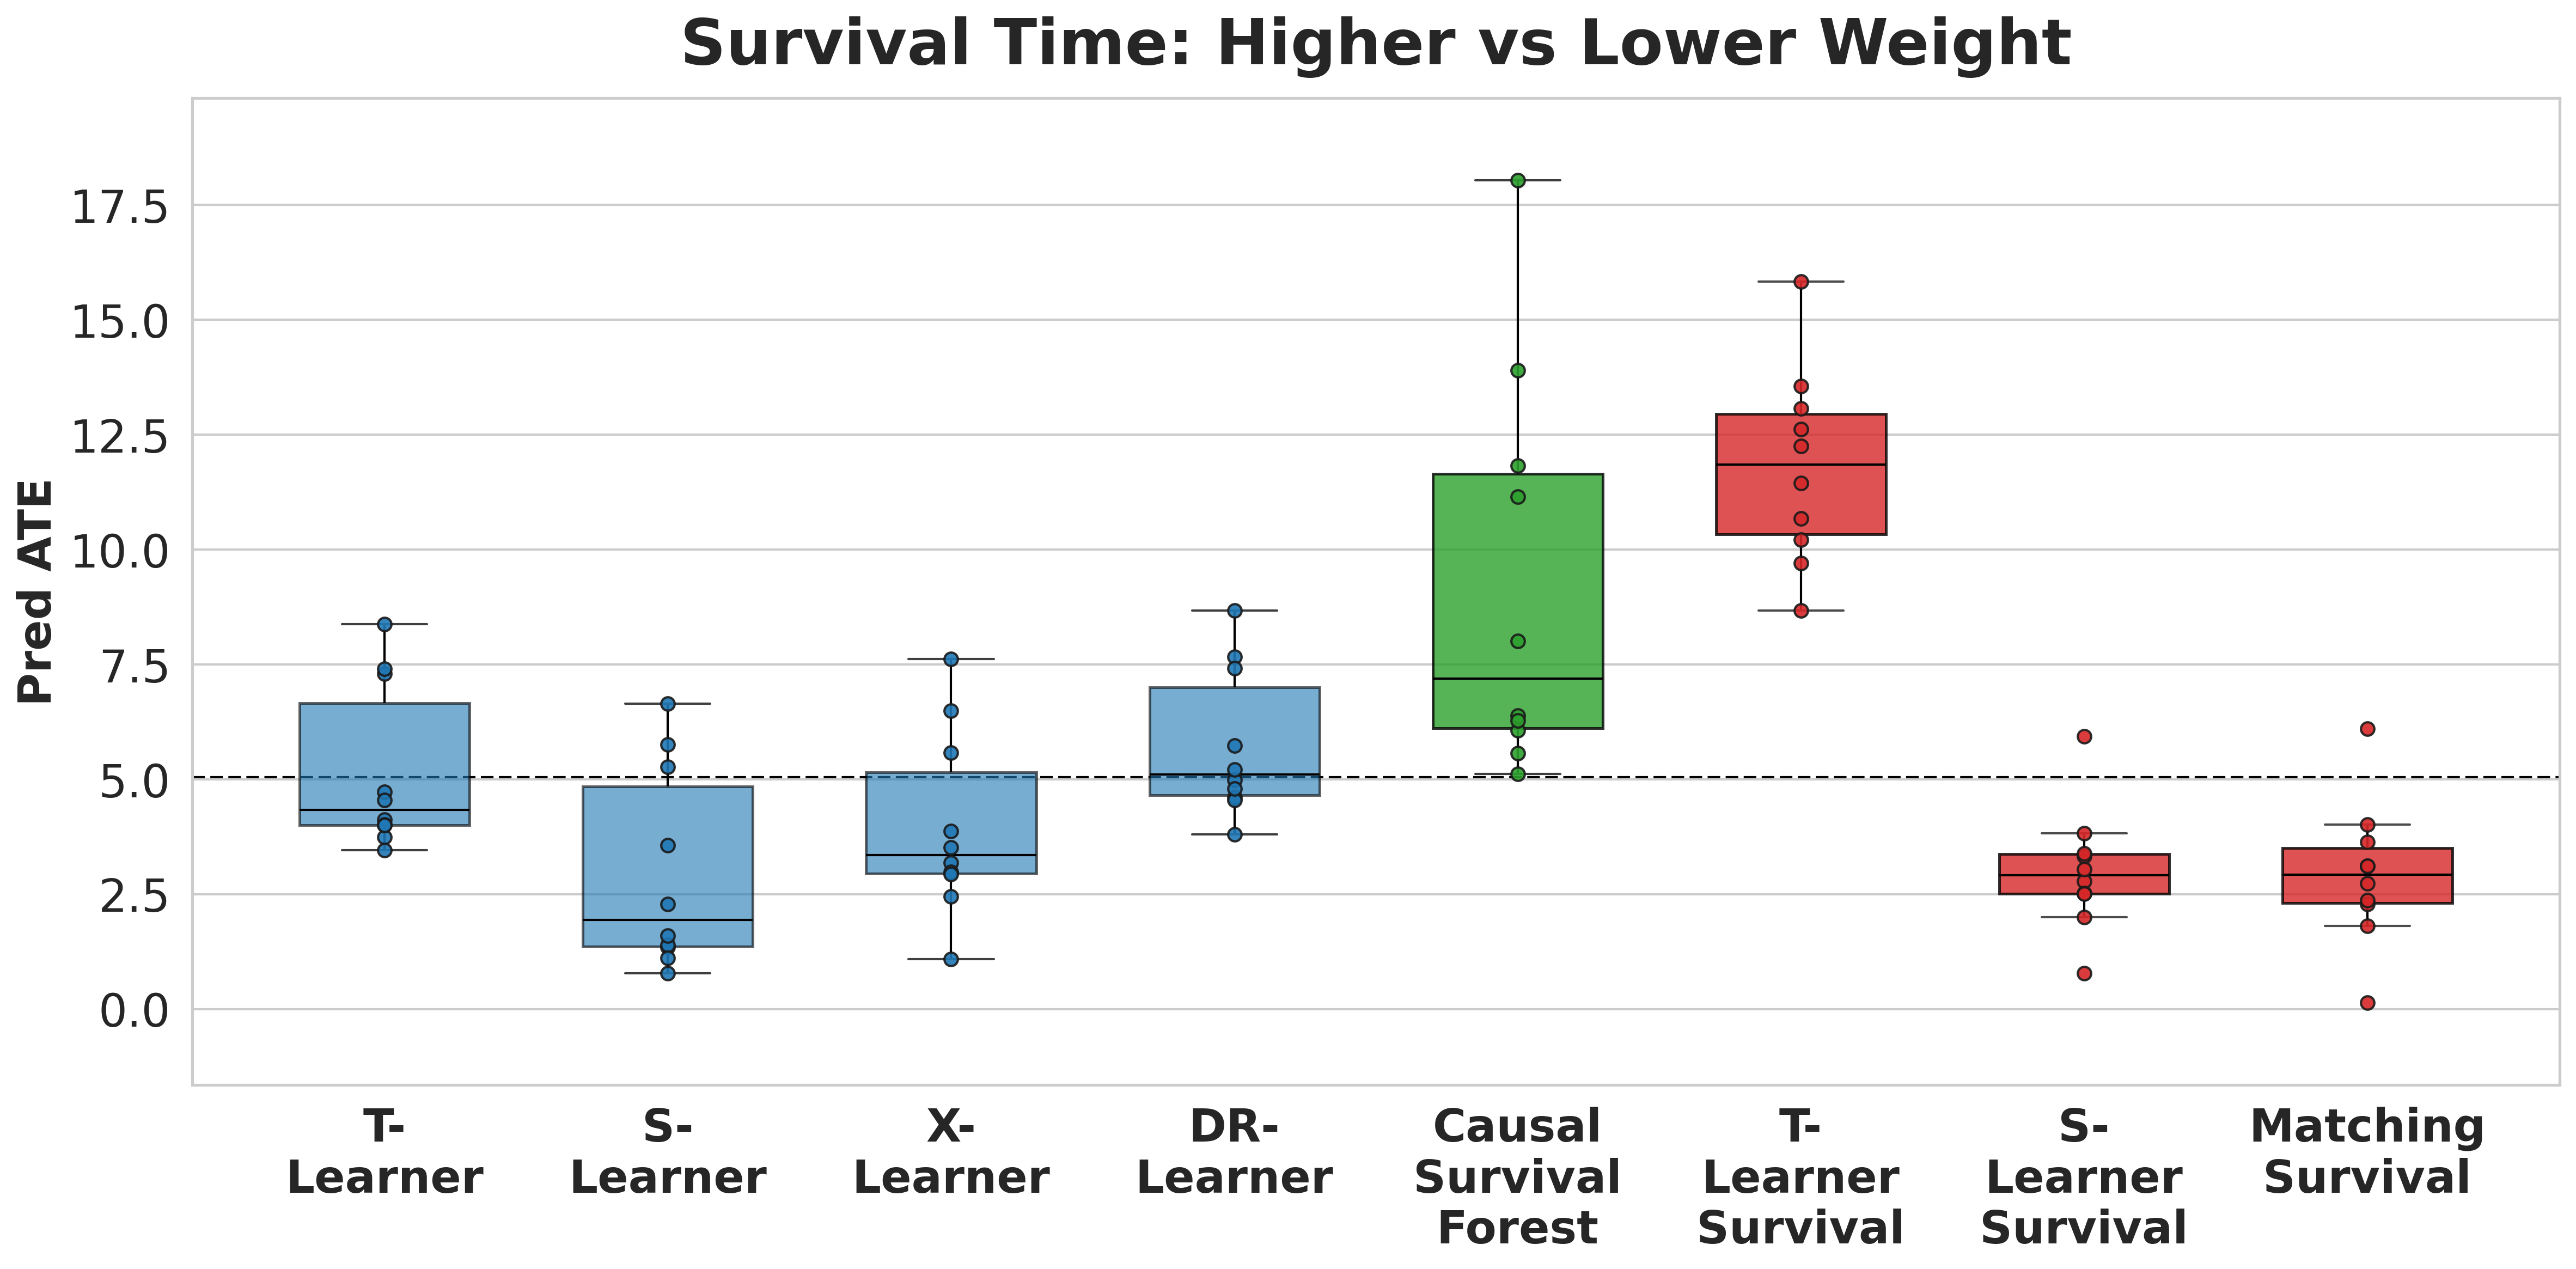

In [30]:
# Set the scenario key
scenario_key = "scenario_1"

skip_experiments_list = None
# skip_experiments_list = ["RCT_0_5", "RCT_0_05"]
# metric = "cate_mse"  # Choose from ['cate_mse', 'ate_true', 'ate_pred', 'ate_bias']
# y_lim = None # Set to False to use individual y-limits for each plot or None for global limits

df_plot = aggregated_results_df(aggregated_results, scenario_key, skip_experiments_list=skip_experiments_list)
plot_aggregated_experiment_results(scenario_key, df_plot, skip_experiments_list, metric=metric, y_lim=y_lim, title_include_scenario=False)

In [25]:
# Set the scenario key
# scenario_key = "scenario_1"
# skip_experiments_list = ["RCT_0_5", "RCT_0_05"]

df_plot = aggregated_results_df(aggregated_results, scenario_key, skip_experiments_list=skip_experiments_list)

print(f"Scenario: {scenario_key}")
pretty_results_table(df_plot)

Scenario: scenario_1


,experiment_id,experiment,method,best_imputation,best_base_model,best_base_survival,cate_mse,ate_bias
0,twin,Survival Time: Higher vs Lower Weight,T-Learner,Pseudo_obs,lasso,,10958.799 ± 431.113,0.135 ± 1.799
1,twin,Survival Time: Higher vs Lower Weight,S-Learner,Margin,lasso,,10782.960 ± 413.821,-2.059 ± 2.176
2,twin,Survival Time: Higher vs Lower Weight,X-Learner,IPCW-T,lasso,,10939.304 ± 425.686,-1.061 ± 1.992
3,twin,Survival Time: Higher vs Lower Weight,DR-Learner,Pseudo_obs,lasso,,10812.410 ± 412.025,0.711 ± 1.608
4,twin,Survival Time: Higher vs Lower Weight,Causal Survival Forest,,,,10864.104 ± 433.521,4.197 ± 4.325
5,twin,Survival Time: Higher vs Lower Weight,T-Learner Survival,,,RandomSurvivalForest,11367.537 ± 489.210,6.770 ± 2.104
6,twin,Survival Time: Higher vs Lower Weight,S-Learner Survival,,,DeepHit,10858.519 ± 406.657,-2.024 ± 1.332
7,twin,Survival Time: Higher vs Lower Weight,Matching Survival,,,DeepHit,10936.231 ± 423.230,-2.104 ± 1.549
